In [2]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
import time
from matplotlib import cm
from collections import OrderedDict

In [5]:
#physical line cut
susc_phys_all = []
q_tot = 21
orb=16
N=25
kz = 0
#fil=13.00
fil=12.78

suscall = []
my_path = f"C:/Users/amnedic/Documents/GitHub/RPA_SrCo2As2/results/MG+GXP+PNG_PD_13.40_to_12.00/"
for q in range(1):
    suscMG = np.loadtxt(my_path+'MGnumba_N='+str(N)+'_fil='+str(fil)+'_q=20.dat', dtype=complex)
    suscall.append(suscMG)
for q in range(21,41):
    suscGXP = np.loadtxt(my_path+'GXPnumba_N='+str(N)+'_fil='+str(fil)+'_q='+str(q)+'.dat', dtype=complex)
    suscall.append(suscGXP)
for q in range(41,60):
    suscPNG = np.loadtxt(my_path+'PNGnumba_N='+str(N)+'_fil='+str(fil)+'_q='+str(q)+'.dat', dtype=complex)
    suscall.append(suscPNG)
for q in range(11):
    suscMG = np.loadtxt(my_path+'MGnumba_N='+str(N)+'_fil='+str(fil)+'_q='+str(20-2*q)+'.dat', dtype=complex)
    suscall.append(suscMG)
print(np.shape(suscall))

suscall = np.real(suscall)

(51, 65536)


In [8]:
#physical susceptibility
def inv_physical_susc(U, JUratio, qnt):
    J = JUratio*U
    U1 = U-2*J
    J1 = J
    o=5
    inter=np.zeros((o**2,o**2), dtype=float)
    lis = []
    for i in range(o**2):
        inter[i,i] = U1
    for i in range(o):
        param = o*i+i
        lis.append(param)
        inter[param,param]=U
    for k in lis:
        for m in lis:
            if m !=k:
                inter[k,m] = J
    for k in range(o):
        for m in range(o):
            A = o*k+m
            B = o*m+k
            if m !=k:
                inter[A,B] = J1
    inter5=inter
    
    Co = np.zeros((80,80))
    Co[0:5,0:5] = inter5[0:5,0:5]
    Co[16:21,16:21] = inter5[5:10,5:10]
    Co[32:37,32:37] = inter5[10:15,10:15]
    Co[48:53,48:53] = inter5[15:20,15:20]
    Co[64:69,64:69] = inter5[20:25,20:25]
    Co[0:5,16:21] = inter5[0:5,5:10]
    Co[0:5,32:37] = inter5[0:5,10:15]
    Co[0:5,48:53] = inter5[0:5,15:20]
    Co[0:5,64:69] = inter5[0:5,20:25]
    Co[16:21,0:5] = inter5[5:10,0:5]
    Co[16:21,32:37] = inter5[5:10,10:15]
    Co[16:21,48:53] = inter5[5:10,15:20]
    Co[16:21,64:69] = inter5[5:10,20:25]
    Co[32:37,0:5] = inter5[10:15,0:5]
    Co[32:37,16:21] = inter5[10:15,5:10]
    Co[32:37,48:53] = inter5[10:15,15:20]
    Co[32:37,64:69] = inter5[10:15,20:25]
    Co[48:53,0:5] = inter5[15:20,0:5]
    Co[48:53,16:21] = inter5[15:20,5:10]
    Co[48:53,32:37] = inter5[15:20,10:15]
    Co[48:53,64:69] = inter5[15:20,20:25]
    Co[64:69,0:5] = inter5[20:25,0:5]
    Co[64:69,16:21] = inter5[20:25,5:10]
    Co[64:69,32:37] = inter5[20:25,10:15]
    Co[64:69,48:53] = inter5[20:25,15:20]
    
    As = np.zeros((48,48))

    INT_inter = np.zeros((269,269))
    INT=np.zeros((256,256))
    INT_inter[0:80,0:80] = Co
    INT_inter[85:165,85:165] = Co
    INT_inter[170:218,170:218] = As
    INT_inter[221:269,221:269] = As
    INT = INT_inter[0:256,0:256]

    o=16
    susc_resh=np.reshape(np.transpose(suscall[qnt]), (o**2,o**2))
    inver = np.dot(np.linalg.inv(np.identity(o**2) - np.dot((susc_resh), INT)), susc_resh)
    
    #physical
    lis = []
    for i in range(o):
        lis.append(o*i+i)
    susc_phys_component = []
    for i in lis:
        for k in lis:
            susc_phys_component.append(inver[k][i])
    susc_phys=0.5*np.real(np.sum(susc_phys_component))
    return 1/susc_phys

In [9]:
def smallfunc(U, JUratio):
    phys = []
    for qnt in range(51):
        susc_p = inv_physical_susc(U,JUratio,qnt)
        phys.append(susc_p)
    return phys

In [36]:
# #13.00
# phys_U05_0995 = smallfunc(1.415349752*0.995, 0.5)
# phys_U025_0995 = smallfunc(1.745195776*0.995, 0.25)
# phys_bare = smallfunc(0, 0.25)
# phys_U0_0995 =  smallfunc(2.103374863*0.995, 0)

#12.78
phys_bare = smallfunc(0, 0)
phys_U025_05 = smallfunc(2.94017731*0.7, 0.25)
phys_U0_05 =  smallfunc(3.158537376*0.7, 0)
phys_U025_0995 = smallfunc(2.94017731*0.995, 0.25)
phys_U0_0995 =  smallfunc(3.158537376*0.995, 0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


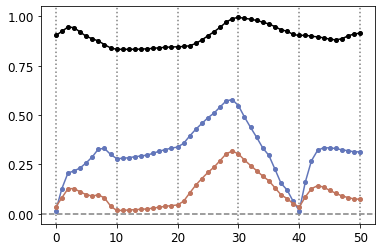

In [61]:
width = 1.5*3.375
height = width/1.618
cmap = cm.get_cmap('twilight_shifted')
rgba_blue = cmap(0.15/0.6)
rgba_brown = cmap(0.42/0.6)
y_min=0
y_max=1.0000001
plt.ylim([-.05,1.05])

fig = plt.figure(1, figsize = [width,height])
ax = fig.add_subplot(111)
grid_y_ticks = np.arange(y_min, y_max, 0.25)
ax.set_yticks(grid_y_ticks, minor=False)
plt.axvline(x=0, color='gray', linestyle=':', markersize=0.01)
plt.axvline(x=10, color='gray', linestyle=':', markersize=0.01)
plt.axvline(x=20, color='gray', linestyle=':', markersize=0.01)
plt.axvline(x=30, color='gray', linestyle=':', markersize=0.01)
plt.axvline(x=40, color='gray', linestyle=':', markersize=0.01)
plt.axvline(x=50, color='gray', linestyle=':', markersize=0.01)
plt.axhline(y=0, color='gray', linestyle='--', markersize=0.01)
plt.plot(phys_U0_0995, 'o', color=rgba_blue, ls='-', markersize=4)
plt.plot(phys_U025_0995, 'o', color=rgba_brown, ls='-', markersize=4)
#plt.plot(phys_U0_05, 'o', color=rgba_blue, ls='-', markersize=2)
#plt.plot(phys_U025_05, 'o', color=rgba_brown, ls='-', markersize=2)
#plt.plot(phys_U025_0995, 'o', color=rgba_brown, ls='-', markersize=4)
plt.plot(phys_bare, 'o', color='k', ls='-', markersize=4)
#plt.plot(phys_U01_0995, 'o', color='purple', ls='-', markersize=4)
#plt.plot(phys_bare, 'o', color='red', ls='-', markersize=2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [62]:
#fig.savefig('inv2_12.78.pdf', bbox_inches='tight', dpi=2000)